## Clasificador de Bayes "ingenuo"
Simple, asume que las características son linealmente independiente y que son identicamente distribuidos. 


ingenuo porque asume con su características indpendientes!!


Las características son i.i.d (independientes e idénticamente distribuidas), generalmente con función de densidad de probabilidad Normal o Gaussiana. La idea de este clasificador es maximizar la probabilidad posterior, de tal forma que:

$$\omega_(predict) = \arg\max_{j=1, \ldots, m}P(\omega_j|\mathbf{x}_i),$$


Donde $P(\omega_j|\mathbf{x}_i)$ es la probabilidad posterior, esto es, la probabilidad de encontrar una etiqueta de clase $\omega_j$ dado un conjunto de patrones $\mathbf{x}_i$ y $\omega_(predict)$ es la etiqueta de clase determinada por el clasificador.

La probabilidad posterior está dada por:

$$P(\omega_j|\mathbf{x}_i)=\frac{P(\mathbf{x}_i|\omega_j)P(\omega_j)}{P(\mathbf{x}_i)},$$


$P(\mathbf{x}_i|\omega_j)=\prod_{k=1,\ldots,p}P(x_{ik}|\omega_j$ la verosimilitud, $P(\mathbf{x}_i)$
la evidencia y $P(\omega_j)$ la probabilidad prior o *a priori*

Se aplica a:
- Filtrado de correo (SPAM)
- Clasificación de secuencias RNA (ácido ribonucleico)
- Diagnostico


Pposterior = (Pcondicional* Pprior)/Evidencia


P(Wj | Xi)

Wj: Conjunto de etiquetas( W0, W1, Wm)
Xi: Patrones o Características de la observación i=1..n
P(Wj | Xi): Probabilidad de obtener la etiqueta de clase Wj dada un patrón Xi observado

**Pcondicional** - Verosimilitud 
Encontrar cierto patrones dada la clase a la que pertenece

Probabilidad de que es de Antioquia dado unos rasgos

P(Xi | Wj): 

Probabilidad de observar el conjunto de características Xi dado que se encuentren en la clase Wj 

**Pprior** - Probabilidad de las clases en general, de las etiquetas(W) - Con conocimiento previo

Probabilidad de que sea de Antioquia dada toda la población colombiana

**Evidencia** - Probabilidad de enontrar un patrón determinado dentro de toda la población sin importar la clase

## Pasos 
1. Encontrar la probabilidad condicional - verosimilitud
2. Prior
3. Establecer la regla con la Probabilidad Posteriori 

El acc de clasificacion es del  96.6666666667 %


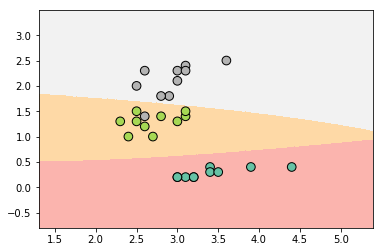

In [3]:
# importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB 
from sklearn import cross_validation
from sklearn import datasets

def graficar_clasificador(clasificador, X, y):
    # definimos valores máximos y mínimos de la malla que vamos a graficar
    min_x, max_x = X[:,0].min() - 1.0 , X[:,0].max() + 1.0
    min_y, max_y = X[:,1].min() - 1.0 , X[:,1].max() + 1.0
    
    paso = 0.01
    
    x_vals, y_vals = np.mgrid[min_x:max_x:paso, min_y:max_y:paso]
    
    # corremos el clasificador sobre la malla
    resultados = clasificador.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    
    resultados = resultados.reshape(x_vals.shape)
    
    
    plt.figure()
    plt.pcolormesh(x_vals, y_vals, resultados, cmap=plt.cm.Pastel1)
    plt.scatter(X[:,0], X[:,1],c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Set2 )
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())
    plt.show()

# importar los datos desde texto plano separado por comas
# archivo_entrada = 'Datos.txt' 
# datos = np.loadtxt(archivo_entrada, delimiter=',') 
# X,y = datos[:, :-1], datos[:, -1]

iris = datasets.load_iris()
X = iris.data[:,[1,3]]
y = iris.target

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size=0.2, random_state=3)

clasificador = GaussianNB()
clasificador.fit(X_train, y_train)

y_predict = clasificador.predict(X_test)

acc = 100.0*(y_predict == y_test).sum()/X_test.shape[0]
print('El acc de clasificacion es del ', acc, '%')

graficar_clasificador(clasificador, X_test, y_test)